In [142]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [144]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [145]:
data.shape

(5572, 5)

### Step 1 -> Data Cleaning

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Details in first step
- Unnamed 2, 3, 4 are illogical

In [147]:
data = data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

#### Details
- V1 and V2 are not useful names
- Encode Targets using LabelEncoder
- No null values found
- Drop the duplicate values

In [148]:
data = data.rename(columns={"v1": "target", "v2": "text"})


In [149]:
data.sample(5)

,target,text
43,ham,WHO ARE YOU SEEING?
2981,ham,"Tonight? Yeah, I'd be down for that"
2776,ham,Send me your id and password
3186,ham,Howz that persons story
861,ham,Your brother is a genius


In [150]:
label_encoder = LabelEncoder()
data["target"] = label_encoder.fit_transform(data["target"])

In [151]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [152]:
data.duplicated().sum()

np.int64(403)

In [153]:
data = data.drop_duplicates(keep="first")
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [154]:
data.shape

(5169, 2)

### Step 2 -> Exploratory Data Analysis

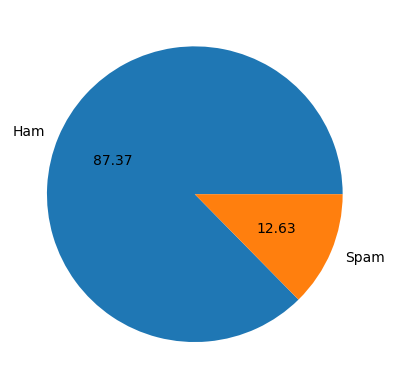

In [155]:
value_counts_of_target = data["target"].value_counts()
plt.pie(value_counts_of_target,labels=["Ham", "Spam"],autopct="%0.2f")
plt.show()

##### Data is imbalanced

In [156]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [157]:
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanjo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sanjo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanjo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [158]:
data["num_of_chars"] = data['text'].apply(len)

In [159]:
data["num_of_words"] = data["text"].apply(lambda x: len(word_tokenize(x)))


In [160]:
data["num_sentences"] = data["text"].apply(lambda x: len(sent_tokenize(x)))

In [161]:
data[["num_of_chars", "num_of_words", "num_sentences"]].describe()

,num_of_chars,num_of_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [162]:
data[data["target"]==0][["num_of_chars", "num_of_words", "num_sentences"]].describe()

,num_of_chars,num_of_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [163]:
data[data["target"]==1][["num_of_chars", "num_of_words", "num_sentences"]].describe()

,num_of_chars,num_of_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_of_chars', ylabel='Count'>

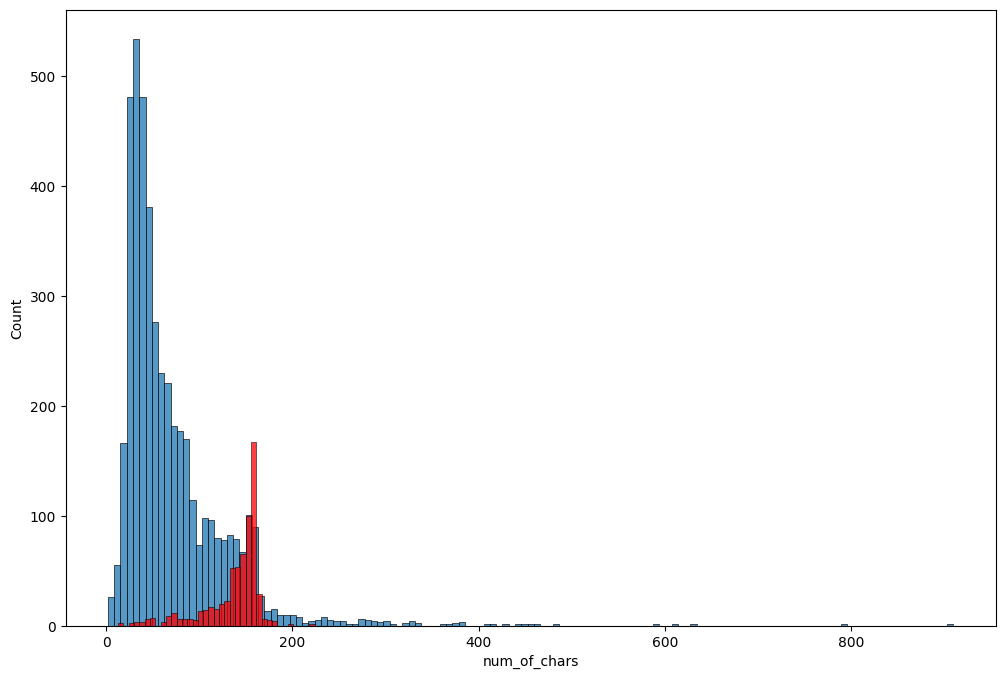

In [164]:
plt.figure(figsize=(12,8))
sns.histplot(data[data["target"]==0]["num_of_chars"])
sns.histplot(data[data["target"]==1]["num_of_chars"],color="red")


<Axes: xlabel='num_of_words', ylabel='Count'>

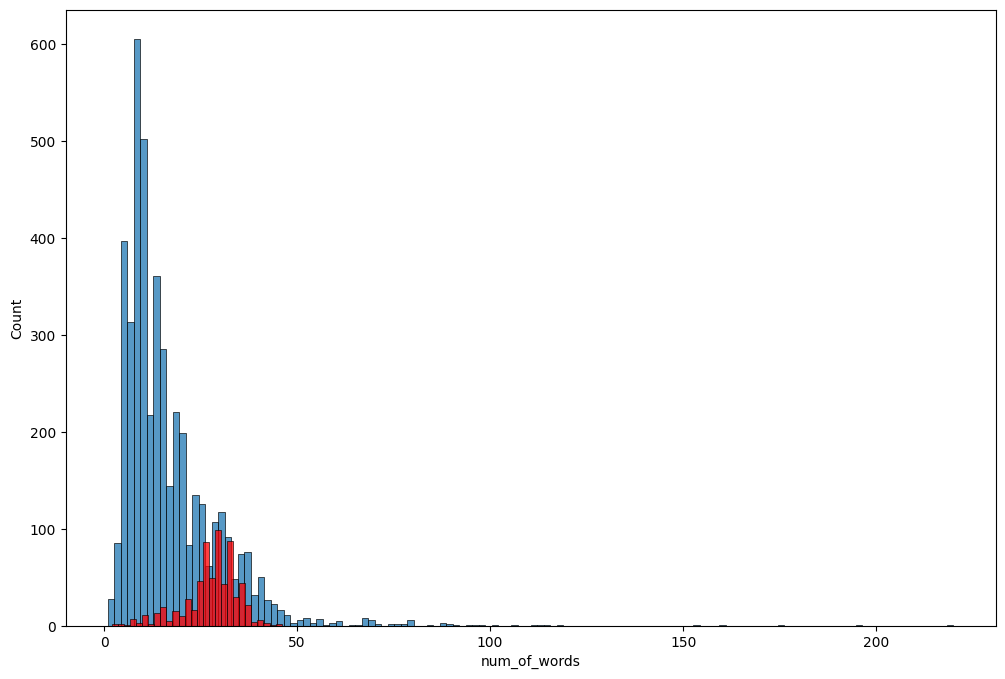

In [165]:
plt.figure(figsize=(12,8))
sns.histplot(data[data["target"]==0]["num_of_words"])
sns.histplot(data[data["target"]==1]["num_of_words"],color="red")


<Axes: xlabel='num_sentences', ylabel='Count'>

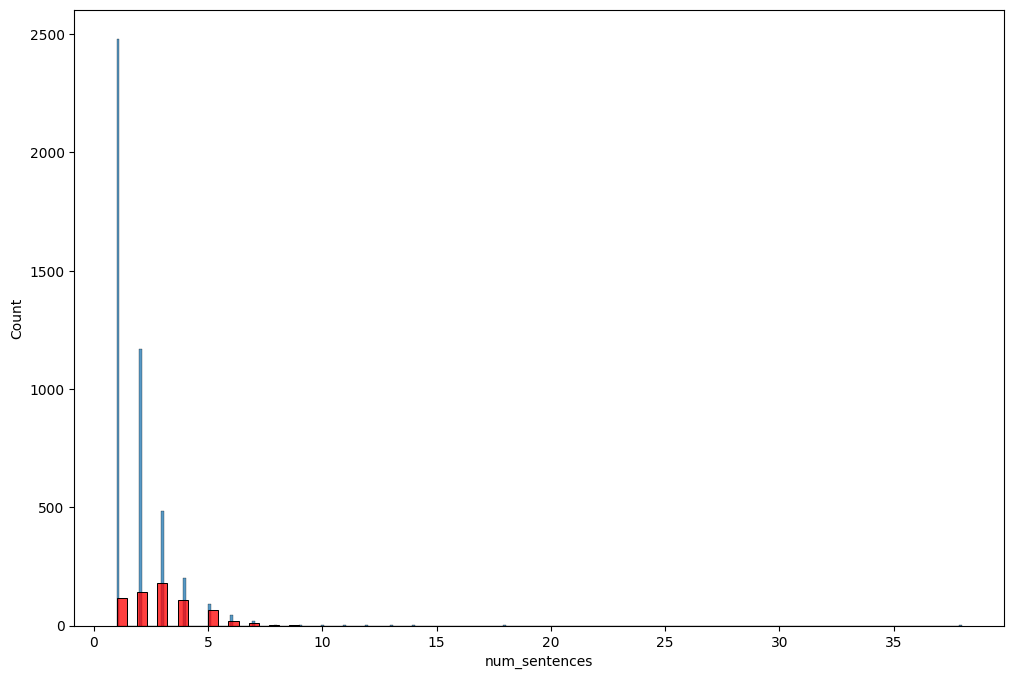

In [166]:
plt.figure(figsize=(12,8))
sns.histplot(data[data["target"]==0]["num_sentences"])
sns.histplot(data[data["target"]==1]["num_sentences"],color="red")


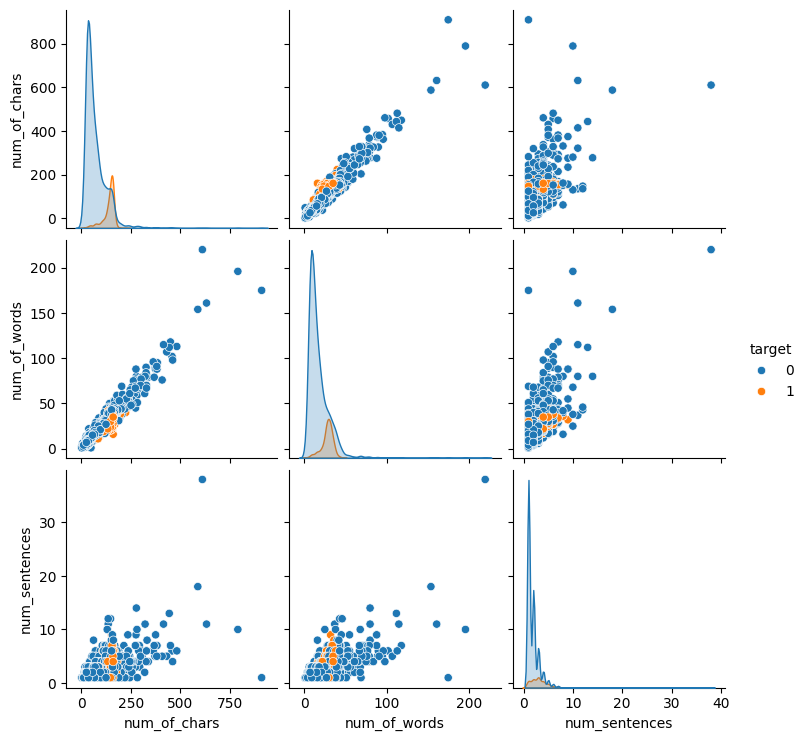

In [167]:
sns.pairplot(data, hue="target")

<Axes: >

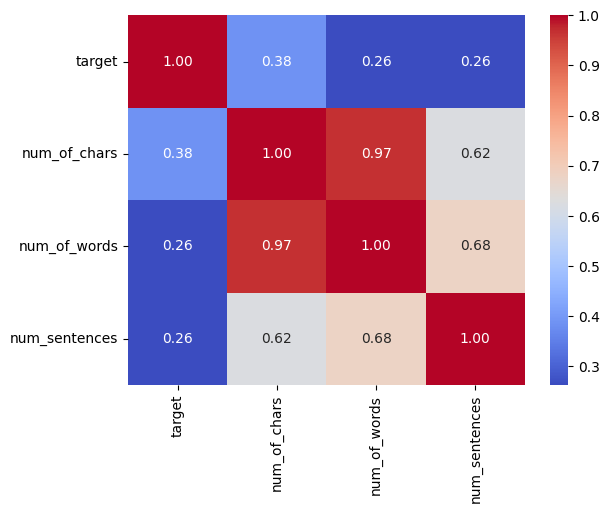

In [168]:
corr_mat = data.drop("text", axis = 1).corr()
sns.heatmap(corr_mat, fmt = ".2f", annot = True, cmap="coolwarm")

### Step 3 -> Text Preprocessing
- Lower case
- Tokenization
- Remove Special Characters
- Remove Stop words (running,...) and punctuation
- Stemming

In [169]:
from nltk.corpus import stopwords
stopwords.words("english")
from nltk.stem.porter import PorterStemmer
import string
def transform_text(text: str):
    text = text.lower()
    text = word_tokenize(text)
    text_without_punctuation = []
    for word in text:
        if word.isalnum():
            text_without_punctuation.append(word)
    text = text_without_punctuation[:]
    text_without_punctuation.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            text_without_punctuation.append(i)
    ps = PorterStemmer()
    text = text_without_punctuation[:]
    text_without_punctuation.clear()
    for i in text:
        text_without_punctuation.append(ps.stem(i))
    return " ".join(text_without_punctuation)


In [170]:
data["transformed_text"] = data["text"].apply(lambda x: transform_text(x))

In [171]:
data.head()

,target,text,num_of_chars,num_of_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [172]:
from wordcloud import WordCloud # It will make the words bigger that are important.
wc = WordCloud(width=500, height = 500,min_font_size=10,background_color="white")

In [173]:
wc_spam = wc.generate(data[data["target"] == 1]["transformed_text"].str.cat(sep = " "))
wc_ham = wc.generate(data[data["target"] == 0]["transformed_text"].str.cat(sep = " "))


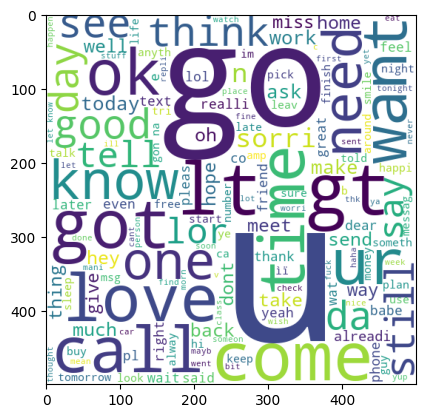

In [174]:
plt.imshow(wc_spam)
plt.show()

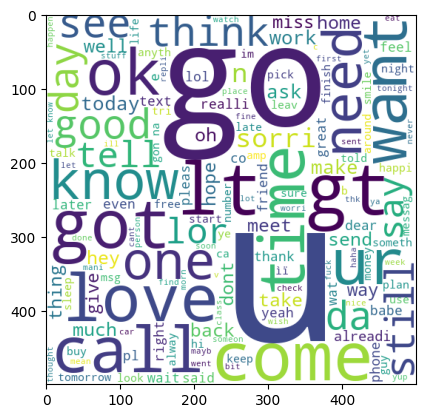

In [175]:
plt.imshow(wc_ham)
plt.show()

In [176]:
### Make corpus
spam_corpus = []
for msg in data[data["target"] == 1]["transformed_text"].tolist():
	for word in msg.split(" "):
		spam_corpus.append(word)
ham_corpus = []
for msg in data[data["target"] == 0]["transformed_text"].tolist():
	for word in msg.split(" "):
		ham_corpus.append(word)

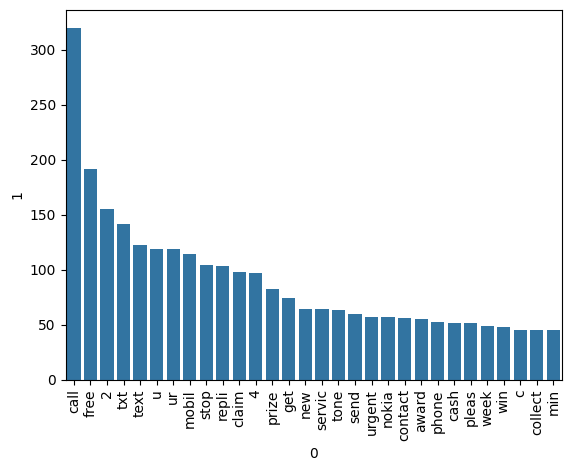

In [177]:
from collections import Counter
df = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x = df[0],y = df[1])
plt.xticks(rotation = "vertical")
plt.show()

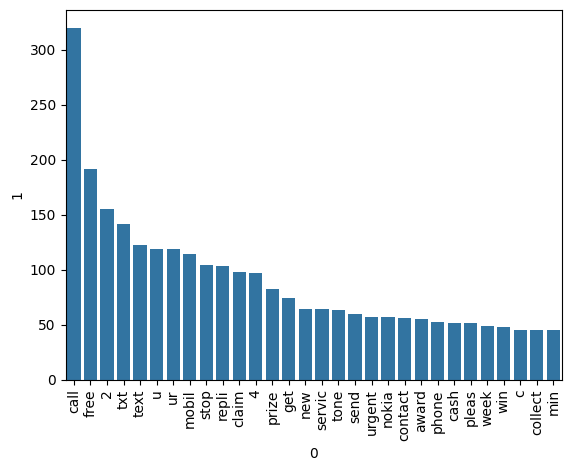

In [178]:
df2 = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x = df[0],y = df[1])
plt.xticks(rotation = "vertical")
plt.show()

#### Vectorize text
- Convert the feature into number

### Step 4 -> Model Building

In [179]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
tfidf2 = TfidfVectorizer(max_features=3000)

In [180]:
from array import array
X = cv.fit_transform(data["transformed_text"]).toarray()
X2 = tfidf.fit_transform(data["transformed_text"]).toarray()
X3= tfidf2.fit_transform(data["transformed_text"]).toarray()
y = data["target"].values

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y , test_size=0.2, random_state=2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y , test_size=0.2, random_state=2)



In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

models_for_cv = {
    "Gaussian" : GaussianNB(),
    "Multinomial": MultinomialNB(),
    "Bernoulli" : BernoulliNB()
}

preds = {}
scores = {}
models_for_tfidf = {
    "Gaussian" : GaussianNB(),
    "Multinomial": MultinomialNB(),
    "Bernoulli" : BernoulliNB()
}

preds2 = {}
scores2 = {}
print("Model Training using CountVectorizer")

for model_name in models_for_cv:
    models_for_cv[model_name].fit(X_train, y_train)
    preds[model_name] = models_for_cv[model_name].predict(X_test)
    print(model_name)
    print("Accuracy Score:",accuracy_score(y_test,preds[model_name]))
    print("Precision Score:",precision_score(y_test, preds[model_name]))
    tn,fp,fn,tp = confusion_matrix(y_test, preds[model_name]).ravel()
    print("True negative: {} False Positive: {} False Negative: {} True Positive: {}".format(tn,fp,fn,tp))
print("###################################################################################################")
print("Model Training using Tfidf Vectorizer")
for model_name in models_for_tfidf:
    models_for_tfidf[model_name].fit(X_train2, y_train2)
    preds2[model_name] = models_for_tfidf[model_name].predict(X_test2)
    print(model_name)
    print("Accuracy Score:",accuracy_score(y_test2,preds2[model_name]))
    print("Precision Score:",precision_score(y_test2, preds2[model_name]))
    tn,fp,fn,tp = confusion_matrix(y_test2, preds2[model_name]).ravel()
    print("True negative: {} False Positive: {} False Negative: {} True Positive: {}".format(tn,fp,fn,tp))

Model Training using CountVectorizer
Gaussian
Accuracy Score: 0.8800773694390716
Precision Score: 0.5315315315315315
True negative: 792 False Positive: 104 False Negative: 20 True Positive: 118
Multinomial
Accuracy Score: 0.9642166344294004
Precision Score: 0.8344370860927153
True negative: 871 False Positive: 25 False Negative: 12 True Positive: 126
Bernoulli
Accuracy Score: 0.9700193423597679
Precision Score: 0.9734513274336283
True negative: 893 False Positive: 3 False Negative: 28 True Positive: 110
###################################################################################################
Model Training using Tfidf Vectorizer
Gaussian
Accuracy Score: 0.8762088974854932
Precision Score: 0.5231481481481481
True negative: 793 False Positive: 103 False Negative: 25 True Positive: 113
Multinomial
Accuracy Score: 0.9593810444874274
Precision Score: 1.0
True negative: 896 False Positive: 0 False Negative: 42 True Positive: 96
Bernoulli
Accuracy Score: 0.9700193423597679
Precision

#### For Max features 3000 in TdidfVectorizer

In [183]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
)

Models = {
    "MultinomialNB": MultinomialNB(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=50, random_state=2),
    "ExtraTreesClassifier": ExtraTreesClassifier(n_estimators=50, random_state=2)

}
predictions = {}
for model_name in Models:
    Models[model_name].fit(X_train3, y_train3)
    predictions[model_name] = Models[model_name].predict(X_test3)
    print(model_name)
    print("Accuracy Score:",accuracy_score(y_test3,predictions[model_name]))
    print("Precision Score:",precision_score(y_test3, predictions[model_name]))
    tn,fp,fn,tp = confusion_matrix(y_test3, predictions[model_name]).ravel()
    print("True negative: {} False Positive: {} False Negative: {} True Positive: {}".format(tn,fp,fn,tp))

MultinomialNB
Accuracy Score: 0.9709864603481625
Precision Score: 1.0
True negative: 896 False Positive: 0 False Negative: 30 True Positive: 108
RandomForestClassifier
Accuracy Score: 0.9738878143133463
Precision Score: 0.9826086956521739
True negative: 894 False Positive: 2 False Negative: 25 True Positive: 113
ExtraTreesClassifier
Accuracy Score: 0.9748549323017408
Precision Score: 0.9745762711864406
True negative: 893 False Positive: 3 False Negative: 23 True Positive: 115


#### Scaling X

In [184]:
# from sklearn.preprocessing import MinMaxScaler
# scaler  = MinMaxScaler()
# scaled_X = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(scaled_X, y , test_size=0.2, random_state=2)


### Step 5 -> Evaluation

In [185]:
import pickle
pickle.dump(tfidf2, open("vectorizer.pkl", "wb"))
pickle.dump(Models["MultinomialNB"], open("mnb.pkl","wb"))

### Step 6 -> Hypertunning Parameters used in models